In [1]:
import datetime
import math
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#matplotlib inline
import pyproj
import pymap3d as pm

from astropy.time import Time



In [132]:
## input data
data = pd.read_csv("data/qc/krhn_galsum.out", sep=" ")
#data["dates"]
#data['Lat'], data['Lon'], data['Alt'] = pm.ecef2geodetic(data['X'], data['Y'], data['Z'], ell=None, deg=True)
#data['ddate'] = pd.to_datetime(data['dates'], format='%d/%m/%Y')
#data['date'] = pd.to_datetime(data.date + data.h.astype(str),format='%d/%m/%Y %H').dt.time
#data['date']
#data['time'] =data['h'].astype(str) +':'+ data['min'].astype(str)+':'+data['sec'].astype(str)
#data['date'] = pd.to_datetime(data['ddate'].astype(str) +' '+ data['time'].astype(str))
#data['jd'] = data['mjd'] + 2400000.5
#data['Date'] = Time(data['mjd'], format='mjd').datetime

#P = pyproj.Proj(proj='utm', zone=34, ellps='WGS84', preserve_units=False)
#data['utmE'], data['utmN'] = P(data['Lon'], data['Lat'])
data['Date']=pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.sort_values(by=['Date'], ascending=True, inplace=True)
## set index
data = data.set_index(['Date'])
#data
## convert and make index to dataframwe
#time_data = "3/4/2022 12:16:25.123"
#format_data = "%d/%m/%Y"
#date = datetime.strptime(data['dates'], format_data)
#data
#header= ['X','Y','Z',]
#data.to_csv('data/test_p2.txt', columns=header)
#utmout = data[['utmE', 'utmN', 'Alt']].copy()
#
#utmout
#utmout.to_csv('Outputs/utm_ts.txt')

In [73]:
#indexdN = data[ (data['dN'] >= 40) | (data['dN'] <=-40) ].index
#data.drop(indexdN , inplace=True)
#header= ['X','Y','Z','dN', 'dE', 'dU']
#data.to_csv('Outputs/astr_enu.csv', columns=header)
#data

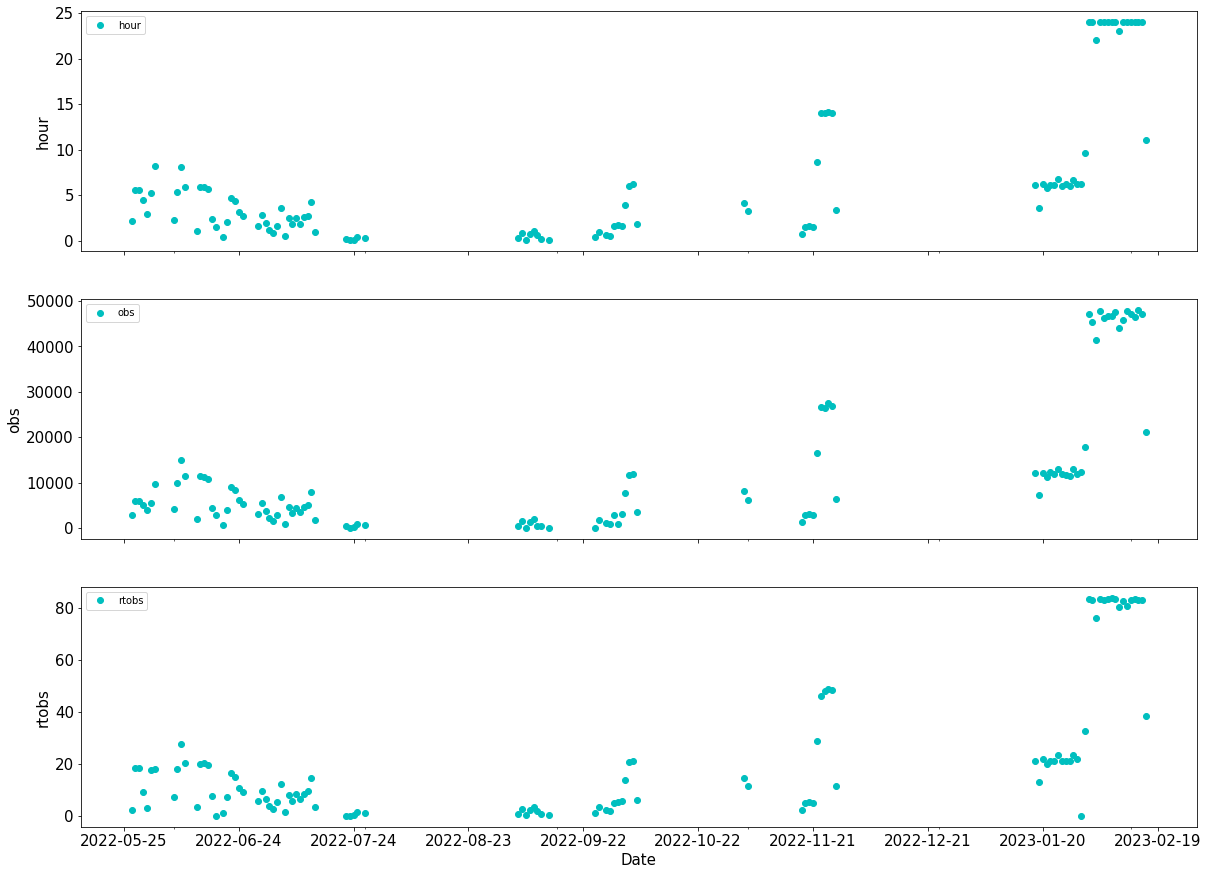

In [52]:
## make time series for the three axes
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex=True,)
#fig, ax = plt.subplots(figsize=(15,15))

plot_cols = ['hour', 'obs', 'rtobs']

data[plot_cols].plot(subplots=True, ax=axes, linestyle='', marker='o', color='c')

#ax.plot(data['rtobs'], marker='',linestyle='-') 
month_day_formatter = mdates.DateFormatter("%Y-%m-%d")
#ax.tick_params(axis='both', which='major', labelsize=30)

#print(axes)

#ylimits = [[-2,2], [-3,3], [-4,4] ]
for i, (ax, col) in enumerate(zip(axes, plot_cols)):
    # add axis labels
    ax.set_ylabel(col,fontsize=15)
    ax.set_xlabel('Date', fontsize=15)
    ax.xaxis.set_major_formatter(month_day_formatter)
    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=15)
    #ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
    #ax.axvline(pd.Timestamp('2023-01-07 01:52:58'),color='r')
    #ax.set_ylim(ylimits[i])
## Save the figure
## =================================================================================
fig.savefig("Outputs/qc/krhn_totsum.jpg", bbox_inches='tight')
## =================================================================================

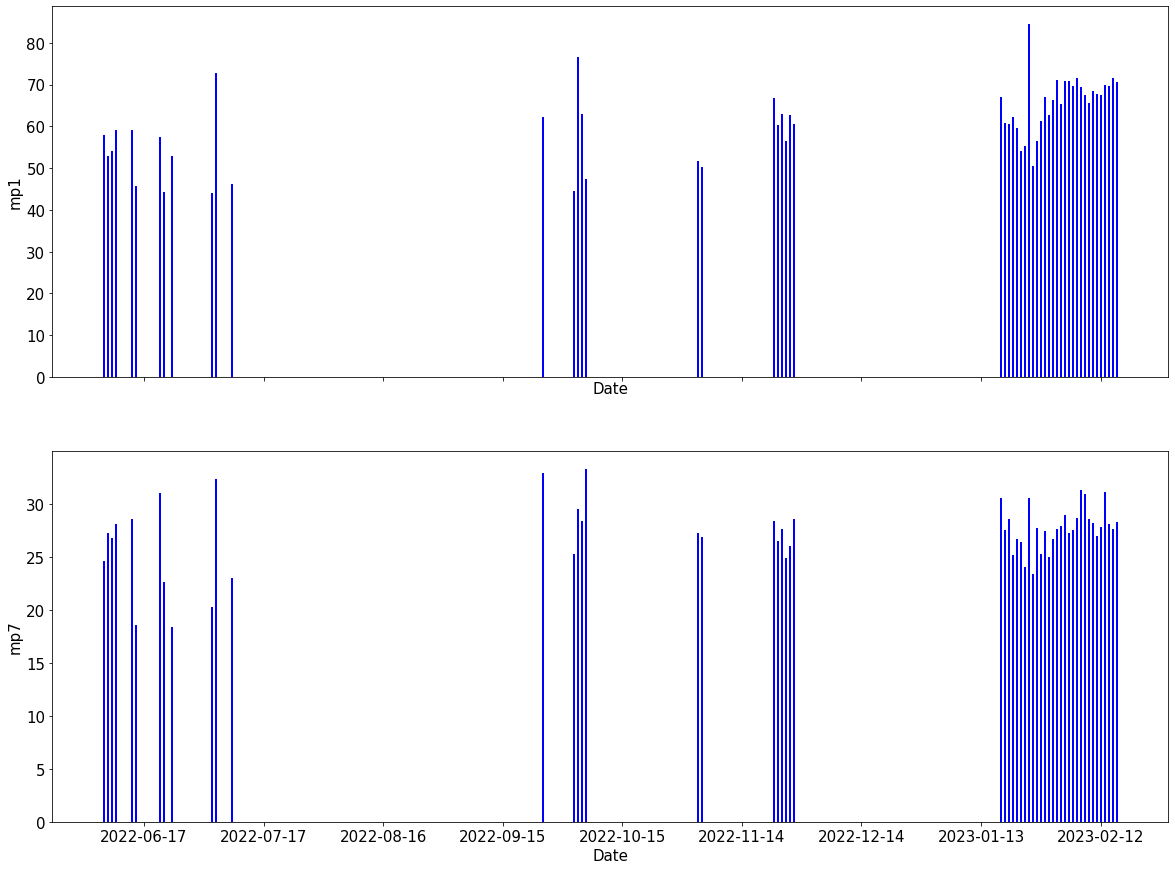

In [65]:
## make time series for the three axes
fig, axes = plt.subplots(2, 1, figsize=(20,15), sharex=True,)
#fig, ax = plt.subplots(figsize=(15,15))

plot_cols = ['mp1', 'mp7']

#data[plot_cols].plot(subplots=True, ax=axes, linestyle='', marker='o', color='c')
#ax.plot(data['rtobs'], marker='',linestyle='-') 
month_day_formatter = mdates.DateFormatter("%Y-%m-%d")
#ax.tick_params(axis='both', which='major', labelsize=30)

#print(axes)
#width = 0.25  # the width of the bars

#ylimits = [[-2,2], [-3,3], [-4,4] ]
for i, (ax, col) in enumerate(zip(axes, plot_cols)):
    # add axis labels
    ax.bar(data.index, data[plot_cols[i]], label=data.index, width=.5, color='b')
    ax.set_ylabel(col,fontsize=15)
    ax.set_xlabel('Date', fontsize=15)
    ax.xaxis.set_major_formatter(month_day_formatter)
    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=15)
    #ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
    #ax.axvline(pd.Timestamp('2023-01-07 01:52:58'),color='r')
    #ax.set_ylim(ylimits[i])
## Save the figure
## =================================================================================
fig.savefig("Outputs/qc/krhn_galsum.jpg", bbox_inches='tight')
## =================================================================================

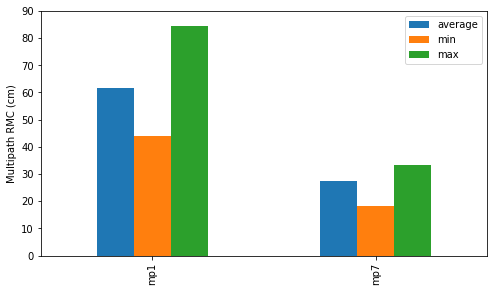

In [133]:
# Plot Min max average of multipath
#fig, ax = plt.subplots(figsize=(15,15))
pd.concat(
    [data.mean().rename('average'), data.min().rename('min'), 
     data.max().rename('max')],
    axis=1).plot.bar(figsize=(8,4.5), ylabel='Multipath RMC (cm)', ylim=[0,90]).get_figure().savefig("Outputs/qc/krhn_galsum_av.jpg", bbox_inches='tight')
#plt.xlabel('Pseudo-Codes')
#plt.ylabel('Multipath RMS (cm)')
#plt.ylim([0,90])

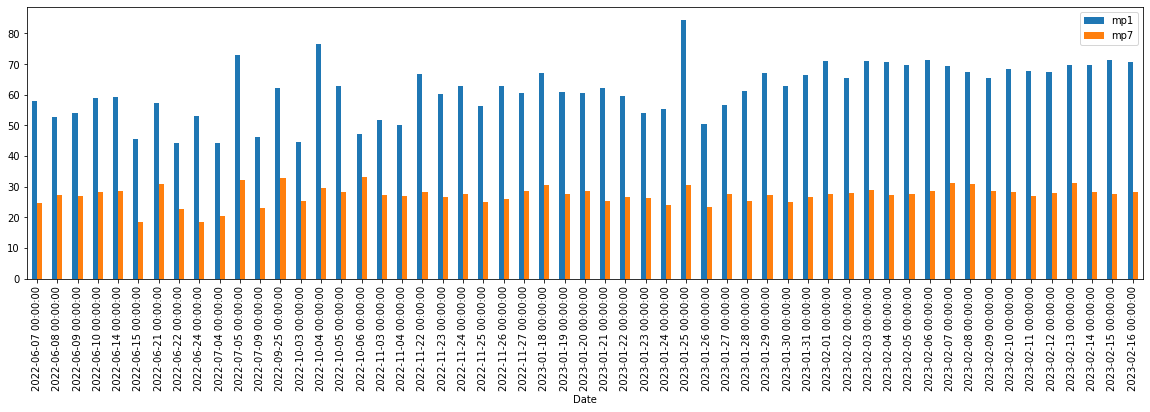

In [68]:
data.plot(y=['mp1', 'mp7'], kind="bar", figsize=(20,5)).get_figure().savefig("Outputs/qc/krhn_galsum_difs.jpg", bbox_inches='tight')